In [1]:
import sys, os
import datetime
from settings import *

sys.path.insert(0, PYSBF_PATH)
from pysbf import *

from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

### Set galaxy name

In [2]:
name = "u12517"

### Initializiation

- Read some output parameters from the ouput data generated by `elliprof`

In [3]:
outFolder = OUT_FOLDER + "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"

df_log = open_log_df(logFile)
sky_med = float(df_log.loc["initial_sky_med"].value)

df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

X0 = float(df.loc['X0'].value)
Y0 = float(df.loc['Y0'].value)

Config = {} 
Config["name"] = name
Config["inFolder"] = IN_FOLDER
Config["objRoot"] = objRoot
Config["configFolder"] = CONFIG_FOLDER
Config["X0"] = X0
Config["Y0"] = Y0
Config["SKY"] = df.loc["sky"].value

In [4]:
## renuc factors for Sextractor
## 100 Mpc renuc = 1.5
## 20 Mpc renuc = 7


### Defining the radius of the central zone t

where Source Extractor avoids finding point source objects 

In [5]:
avoiding_r = widgets.FloatSlider(
                    value=20,
                    min=1,
                    max=200,
                    step=1,
                    description="R_aperture",
                )

print("Radius of the avoding zone [pix]")
display(avoiding_r)

Radius of the avoding zone [pix]


FloatSlider(value=20.0, description='R_aperture', max=200.0, min=1.0, step=1.0)

### Run Source Extractor 

to find point source objects, extended objects and build masks

In [6]:
# used Dmask instead of mask1
catalName, catal_df, se_objname, se_mask, se_masked, residual, segment = SE_foreground(model=0, 
                                       smooth=1.0, minArea=10, thresh=2.5,
                                       r_aperture = avoiding_r.value,   # [pixel] ignore objects within the aperture
                                       renuc=2, 
                                       Extended = False,
                                        **Config) 

catal_df.head()

> 
----- SExtractor 2.8.6 started on 2024-08-12 at 21:30:19 with 8 threads

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for smooth
Measuring from: "Unnamed"  / 1025 x 1022 / 0 bits FLOATING POINT data
> Looking for model.000_se_renuc_2
Weighting from: "Unnamed"  / 1025 x 1022 / 0 bits FLOATING POINT data
Detection+Measurement image: > Setting up background maps
> Filtering background map(s)
> Computing background d-map
> Computing background-noise d-map
(M+D) Background: 9.31808    RMS: 80.8733    / Threshold: 202.183    
> Scanning image
> Line:   16  Objects:       15 detected /        0 sextracted
> Line:   32  Objects:       30 detected /        0 sextracted
> Line:   48  Objects:       33 detected /        0 sextracted
> Line:   64  Objects:       44 detected /        0 sextracted
> Line:   80  Objects:       48 detected /        0 sextracted
> 

/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/obj.000.pro


,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,A_IMAGE,B_IMAGE,THETA_IMAGE,...,MAGERR_APER_1,MAGERR_APER_2,MAGERR_APER_3,MAGERR_APER_4,MAGERR_APER_5,MAG_ISO,MAGERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,rc
0,1,866.625,37.766,349.972745,43.978395,-12.4441,0.0194,4.546,1.670,-87.0,...,0.0170,0.0157,0.0153,0.0142,0.0144,-12.2381,0.0133,-12.4201,0.0220,604.039638
1,2,19.501,37.580,349.939624,43.957184,-12.8360,0.0303,5.030,3.707,-50.9,...,0.0712,0.0600,0.0563,0.0371,0.0304,-12.1712,0.0183,-12.8692,0.0310,759.017950
2,3,432.294,30.634,349.955540,43.967697,-11.9031,0.0253,1.994,1.155,54.8,...,0.0247,0.0242,0.0240,0.0244,0.0254,-11.1211,0.0231,-11.3275,0.0392,548.926122
3,4,491.421,22.989,349.957612,43.969369,-11.1041,0.0371,2.603,1.068,64.0,...,0.0379,0.0345,0.0336,0.0321,0.0342,-10.8322,0.0274,-11.0710,0.0476,544.980902
4,5,588.459,11.504,349.961047,43.972087,-14.3853,0.0037,4.105,3.175,74.4,...,0.0050,0.0046,0.0044,0.0034,0.0032,-14.3887,0.0037,-14.4295,0.0043,551.504433


## Use DS9 and keep it open while working interatively

Open ds9 and wait for its window to fully appear on the screen.

Probably, the most helpful image is the residual image.

In [7]:
# print("se_mask: ", se_mask)
# print("se_masked: ", se_masked)
# print("residual: ", residual)
# print("se_objname: ", se_objname)

_ = CMD_button("ds9 "+se_mask+" &", "[DS9] se_mask")
_ = CMD_button("ds9 "+se_masked+" &", "[DS9] se_masked")
_ = CMD_button("ds9 "+residual+" &", "[DS9] residual >>>")
_ = CMD_button("ds9 "+se_objname+" &", "[DS9] se_objname")

### [DS9] Regions Guide 

- Green: extended opbject
- Cyan: star, point source
- Yellow: ignored or avoding zone

In [8]:
print("Radius of the avoding zone [pix]")
display(avoiding_r)

Radius of the avoding zone [pix]


FloatSlider(value=20.0, description='R_aperture', max=200.0, min=1.0, step=1.0)

### Run Source Extractor multiple tiles

and build point source catalog for likenew. You can alter the radius of the avoidance zonce in the above cell.

In [9]:
catalName, catal_df, sex_objname, se_mask, se_masked, residual, segment = SE_foreground(
                                       model=0,
                                       smooth=1.0, minArea=5, thresh=2,
                                       r_aperture = avoiding_r.value,   # [pixel] ignore objects within the aperture
                                       renuc=2,
                                        **Config) 

# making point source catalogs for likenew
lkn_file_name, ingore_id_list = make_se_lkn(catal_df, model=0, star_f=0.7, zp = 35.081,
                            r_aperture=avoiding_r.value, Extended=False,
                            **Config)

_ = CMD_button("ds9 "+residual+" &", "[DS9] residual")
reg_button = ds9_region_display(reg_file="./ds9.reg")
_ = Logtext(lkn_file_name, "lkn file")

resid = residual.rsplit('/', 1)[-1]
lkn = lkn_file_name.rsplit('/')[-1]
lkn6 = "{}j.lkn6".format(lkn.rsplit('.')[0])
ptm6 = "{}j.ptm6".format(lkn.rsplit('.')[0])

like_pack = [lkn, lkn6, ptm6, resid]

> 
----- SExtractor 2.8.6 started on 2024-08-12 at 21:30:22 with 8 threads

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for smooth
Measuring from: "Unnamed"  / 1025 x 1022 / 0 bits FLOATING POINT data
> Looking for model.000_se_renuc_2
Weighting from: "Unnamed"  / 1025 x 1022 / 0 bits FLOATING POINT data
Detection+Measurement image: > Setting up background maps
> Filtering background map(s)
> Computing background d-map
> Computing background-noise d-map
(M+D) Background: 9.31808    RMS: 80.8733    / Threshold: 161.747    
> Scanning image
> Line:   16  Objects:       25 detected /        0 sextracted
> Line:   32  Objects:       45 detected /        0 sextracted
> Line:   48  Objects:       65 detected /        0 sextracted
> Line:   64  Objects:       83 detected /        0 sextracted
> Line:   80  Objects:      103 detected /        0 sextracted
> 

/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/obj.000.pro
wrote:  /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/u12517_se_lknj.000
number of lines:  1082
# of GCs:  470
# of galaxies:  678


XPA$ERROR no 'xpaset' access points match template: ds9
XPA$ERROR no 'xpaset' access points match template: ds9


### Build an extra mask for extended objects

- These are the objects that are not included in the LF list, and we want to mask them. 
- To do so we use the segmentation image created by ds9
- `ingore_id_list` holds the id of these objects
- `segment` is the segmentation file generated by source extractor

In [10]:
segment

'/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c//objCheck.000.segment'

In [11]:
extra_mask_name = "extra_mask.fits"

In [12]:
# if invert == True
# everywhere 1
# msked object 0
_ = seg2mask(segment, objRoot+extra_mask_name, good_segments=ingore_id_list, invert=True)

<Axes: >

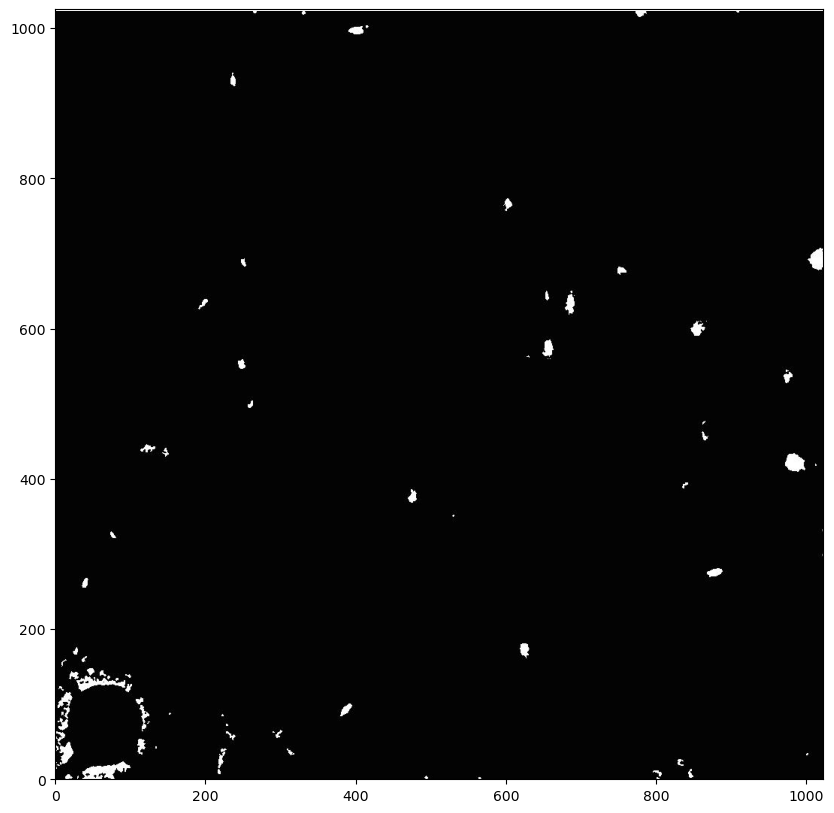

In [13]:
tv(objRoot+extra_mask_name)

## Run LikeNew

In [14]:
like_pack

['u12517_se_lknj.000',
 'u12517_se_lknjj.lkn6',
 'u12517_se_lknjj.ptm6',
 'resid.000']


cp /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//u12517/u12517j.dmask /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/.
 LIKENEW6 -- IR version 2020
 FWHM:   1.39999998    
 distance:   65.0000000    
 kscale:   1.2000000476837158     
 delta:   1.39999998    
 snlim:   4.50000000    
 mlim:   21.0000000    
 1082 sources found,  727 used for fits;  sky radius = 150
 Using Mv = -7.40 for GCs (NOT for JHK)
 Using AB mags for JHK
 Using galaxy slope gamma =  0.25 
 Using 34.50 normalization for 1 gal/arcsec
 A(I) = 0.5000     0.6000    
 F =   7.362667        ITER =   0   LAMBDA =  -3
 A(I) = 0.3999      1.069    
 F =   7.341449        ITER =   1   LAMBDA =  -1
 A(I) = 0.4679      1.157    
 F =   7.340413        ITER =   2   LAMBDA =  -2
 A(I) = 0.4914      1.203    
 F =   7.340318        ITER =   3   LAMBDA =  -3
 A(I) = 0.4932      1.207    
 F =   7.340317        ITER =   4   LAMBDA =  -4

   58 ite

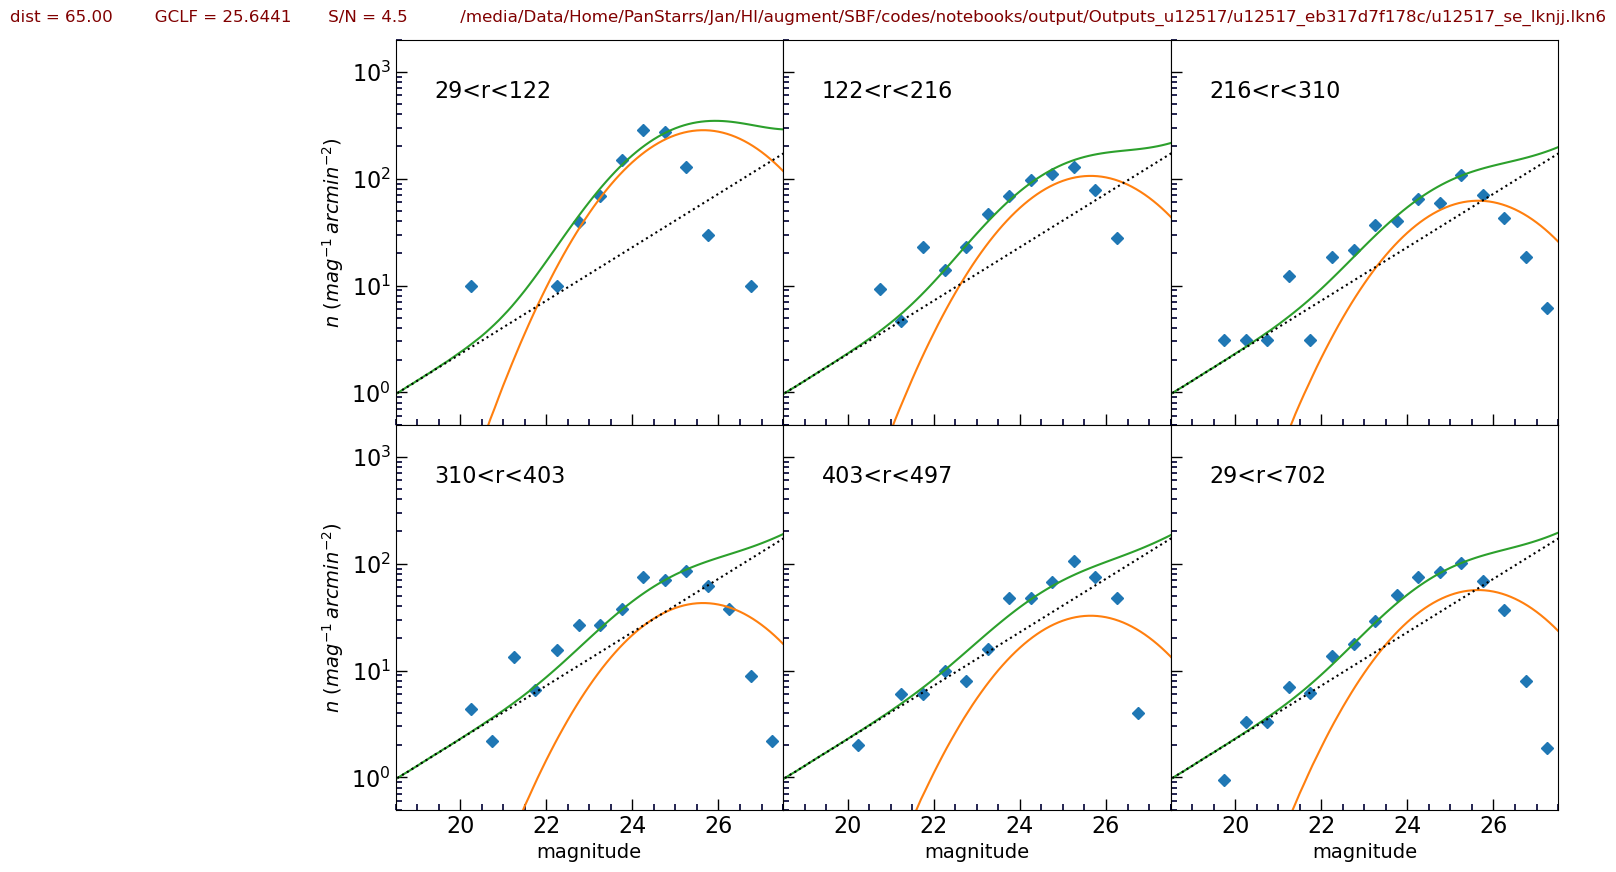

In [23]:
pylike(like_pack, 
            gclf_width=1.4, 
            distance=65, 
            bright_cutoff=21, 
            kscale=1.2, plot=True,
            **Config)

# code to display the button
_ = Logtext(os.path.join(objRoot, "{}j.lkn6".format(lkn.rsplit('.')[0])), "lkn6")

### LikeNew point source mask

In [16]:
ptm6

'u12517_se_lknjj.ptm6'

### merge masks and update the residual image

residual file ready for dophot:  update_resid.000


<Axes: >

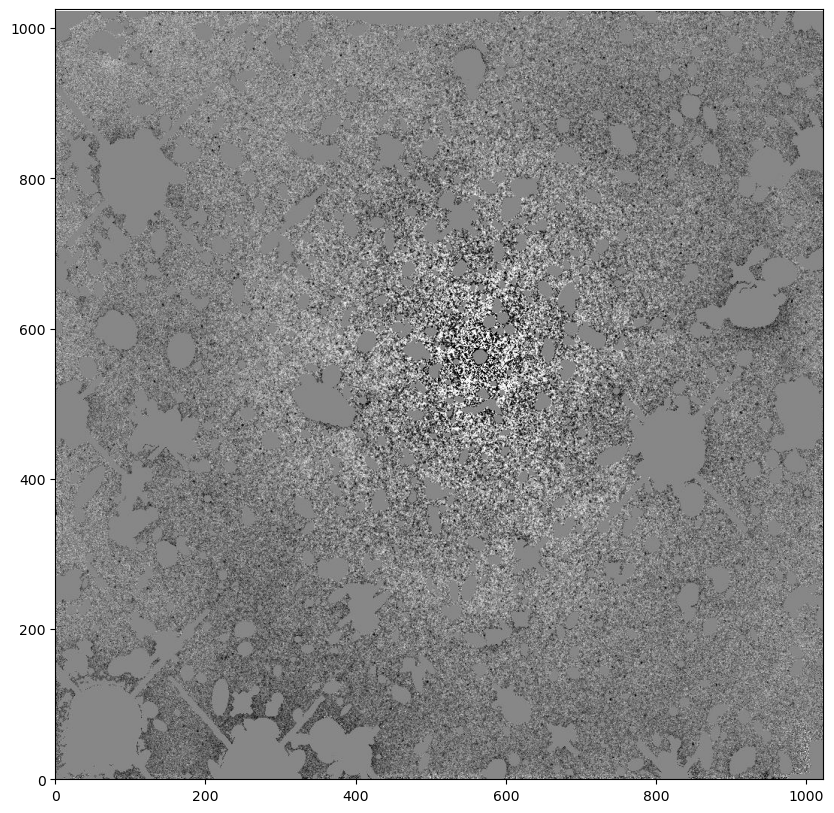

In [17]:
update_resid = resid_ptm6(resid, [ptm6, extra_mask_name], outfile='update_resid.000', **Config)
# outfile = resid_ptm6(resid, [ptm6], outfile='test.000', **Config)
tv(os.path.join(objRoot, update_resid))

### check the updated residual on DS9


In [18]:
! ds9 {objRoot}/update_resid

## Tidy commands

to edit the filter mask

<img src="img/tidy.jpg" alt="Alternative text" />

### [Monsta] Tidy command to edit the mask manually

- press `x` to edit, i.e. adding a mask of the specified size under the cursor
- press `e` to save

### Parameters:

- self
    - False: ptm6 --> ptm6b
    - True: ptm6 --> ptm6b  (continue editing)
    
- rad
    - mask radius [pixel]

In [22]:
like_pack[3] = update_resid
edit_ptm6_mask(like_pack, self=True, rad=5, **Config)

modified mask name: u12517_se_lknjj.ptm6b
backup: u12517_se_lknjj.ptm6b.20240812213048


Can't open display 

Program received signal SIGSEGV: Segmentation fault - invalid memory reference.

Backtrace for this error:
#0  0x7aec7f63a7ba
#1  0x7aec7f639993
#2  0x7aec7f04251f
#3  0x7aec7f41cce9
#4  0x5790de1155dd
#5  0x5790de00d3f6
#6  0x5790de0c7f40
#7  0x5790de00b1a0
#8  0x5790de005d03
#9  0x5790de0087d9
#10  0x5790de003ead
#11  0x7aec7f029d8f
#12  0x7aec7f029e3f
#13  0x5790de003da4
#14  0xffffffffffffffff
Segmentation fault (core dumped)


'u12517_se_lknjj.ptm6b'

## [Monsta] Display all 3 frames 

- residual
- ptm6
- ptm6b

In [21]:
display_ptm6_mask(like_pack, **Config)

Can't open display 

Program received signal SIGSEGV: Segmentation fault - invalid memory reference.

Backtrace for this error:
#0  0x7bae32f387ba
#1  0x7bae32f37993
#2  0x7bae3264251f
#3  0x7bae329fdce9
#4  0x5e1ca2a495dd
#5  0x5e1ca29413f6
#6  0x5e1ca29fbf40
#7  0x5e1ca293f1a0
#8  0x5e1ca2939d03
#9  0x5e1ca293c7d9
#10  0x5e1ca2937ead
#11  0x7bae32629d8f
#12  0x7bae32629e3f
#13  0x5e1ca2937da4
#14  0xffffffffffffffff
Segmentation fault (core dumped)


# Hybrid

### Combining Point Sources found by Source Extractor and DoPhot

In [21]:
catalName, catal_df, sex_objname, se_mask, se_masked, residual, segment = SE_foreground(
                                       model=0,
                                       smooth=1.0, minArea=5, thresh=2.0,
                                       r_aperture = avoiding_r.value,   # [pixel] ignore objects within the aperture
                                       renuc=2,
                                        **Config) 

lkn_file_name, ingore_id_list = make_se_lkn(catal_df, model=0, star_f=0.7, zp = 35.081,
                            r_aperture=avoiding_r.value, Extended=True, sfx='segal',
                            **Config)

_ = CMD_button("ds9 "+residual+" &", "[DS9] residual")
reg_button = ds9_region_display(reg_file="./ds9.reg")
_ = Logtext(lkn_file_name, "lkn file")

resid = residual.rsplit('/', 1)[-1]
lkn_segal = lkn_file_name.rsplit('/')[-1]
lkn6 = "{}j.lkn6".format(lkn_segal.rsplit('.')[0])
ptm6 = "{}j.ptm6".format(lkn_segal.rsplit('.')[0])

like_pack = [lkn_segal, lkn6, ptm6, resid]


/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/obj.000.pro
wrote:  /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/u12517_segal_lknj.000
number of lines:  622
# of GCs:  470
# of galaxies:  678


In [22]:
def update_ptm6(ptm6, all_masks, outfile=None, **Config):

    objRoot = Config["objRoot"]
    name = Config["name"]
    
    if outfile is None:
        outfile = "{}_updated.ptm6b".format(name)
        
    cwd = os.getcwd()
    os.chdir(objRoot)
    monsta_script = """
        rd 1 """+ptm6
    
    
    for mask in all_masks:
        monsta_script+="""
        rd 2 """+mask+"""
        mi 1 2
        """
        
    monsta_script += """di 1 1
    """
    monsta_script += """wd 1 """+outfile+""" bitmap
    """

    run_monsta(monsta_script, 'monsta.pro', 'monsta.log')
    print("residual file ready for dophot: ", outfile)
    os.chdir(cwd)
    
    return outfile

In [23]:
ptm6

'u12517_segal_lknjj.ptm6'

In [24]:
like_pack

['u12517_segal_lknj.000',
 'u12517_segal_lknjj.lkn6',
 'u12517_segal_lknjj.ptm6',
 'resid.000']

In [25]:
pylike(like_pack, 
            gclf_width=1.4, 
            distance=60, 
            bright_cutoff=20.5, 
            kscale=1.2, plot=False,
            **Config)


cp /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//u12517/u12517j.dmask /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/.
Beta  =	      4.9303e-01 	 #gxy / total sources

Cnorm =	      2.0457e-02 	 GC normalization
Cmax  =	      25.470 		 GC peak magnitude
Delta =	      1.4 		 GC distribution width
Alpha =	      0.898 		 GC log slope vs log r
Total # GC =  202.3

Gamma =	      0.25000 		 Gxy log slope vs m
Gnorm =	      1.46628 		 Gxy count / 1/" @ 34.50
Tnorm =	      0.11847 		 Tyson Gxy count @ 30.13
Total # gxy =  196.7


In [26]:
# if invert == True
# everywhere 1
# msked object 0
_ = seg2mask(segment, Config["objRoot"]+"test.fits", good_segments=ingore_id_list, invert=True)

residual file ready for dophot:  test.000


<Axes: >

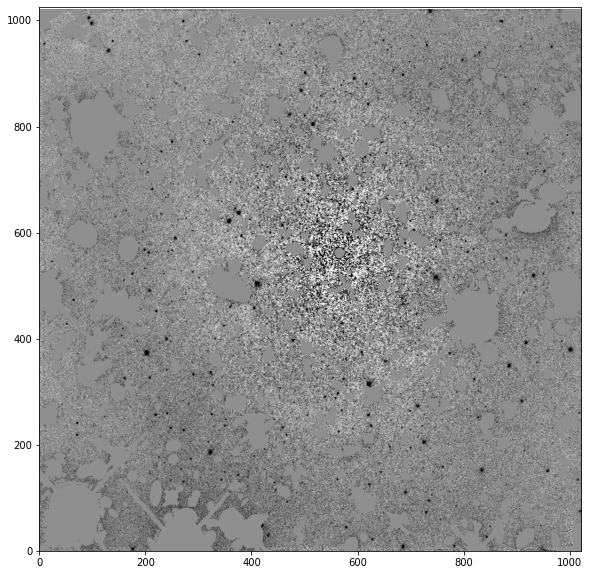

In [27]:
# outfile = resid_ptm6(resid, [ptm6, "test.fits"], outfile='test.000', **Config)
outfile = resid_ptm6(resid, [ptm6, "test.fits"], outfile='test.000', **Config)
tv(os.path.join(objRoot, outfile))

In [28]:
outfile = update_ptm6(ptm6, ["test.fits"], outfile=ptm6, **Config)

residual file ready for dophot:  u12517_segal_lknjj.ptm6


In [29]:
# like_pack[3] = outfile

In [30]:
edit_ptm6_mask(like_pack, self=True, rad=5, **Config)

modified mask name: u12517_segal_lknjj.ptm6b
backup: u12517_segal_lknjj.ptm6b.20240308151610


'u12517_segal_lknjj.ptm6b'

In [31]:
do_resid_image = resid_ptm6(resid, [ptm6+"b"], outfile="{}.2dophot".format(resid), **Config)
do_resid_image

residual file ready for dophot:  resid.000.2dophot


'resid.000.2dophot'

<Axes: >

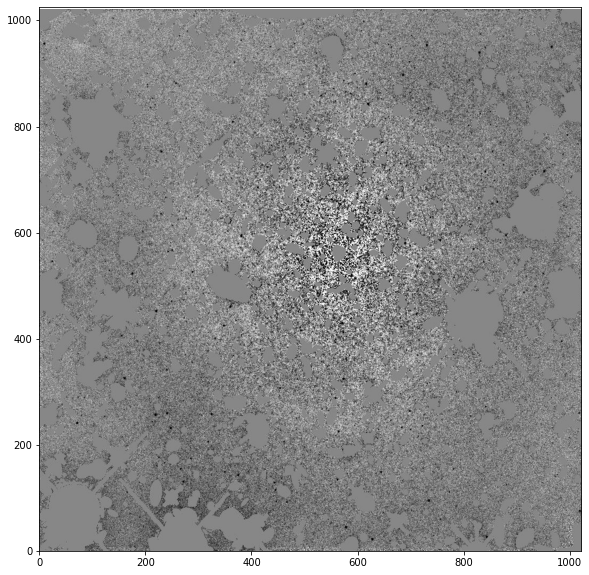

In [32]:
tv(os.path.join(objRoot, do_resid_image))

In [33]:
# used Dmask instead of mask1
log, resid_file, dpar_file, image_in, image_out, dpo_file = DoPhot(model=0, renuc=2, 
                                                                   image_in = do_resid_image,
                                                                   object_out = "{}.hybrid.dpo".format(name),
                                                                   **Config) 

# print("log file: ", log)
_ = Logtext(log, "log")

# print("dpar file: ", dpar_file)
_ = Logtext(dpar_file, "Dpar File")

if os.path.exists(image_in):
    print("input image: ", image_in)
    _ = CMD_button("ds9 "+image_in+" &", "[DS9] input image")
else:
    print("input image not found: ", image_in)

# if os.path.exists(resid_file):
#     print("residual image: ", resid_file)
#     _ = CMD_button("ds9 "+resid_file+" &", "[DS9] residual image")
# else:
#     print("residual image not found: ", resid_file)

print("dpo file: ", dpo_file)
if dpo_file is not None:
    _ = Logtext(dpo_file, "DPO File")
    
# print("output image: ", image_out)
# if image_out is not None:
#     _ = CMD_button("ds9 "+image_out+" &", "[DS9] dpr image")

reg_button = ds9_region_display(reg_file="./ds9.reg")

input image:  /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/resid.000.2dophot


dpo file:  /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/u12517.hybrid.dpo


In [34]:
print("Radius of the avoding zone [pix]")
display(avoiding_r)

Radius of the avoding zone [pix]


FloatSlider(value=20.0, description='R_aperture', max=200.0, min=1.0, step=1.0)

In [35]:
DF, lkn_dophot = make_do_lkn(dpo_file, model=0, r_aperture=avoiding_r.value, 
                                    exclude457=False, 
                                    ZP=35.081, 
                                    **Config)

_ = Logtext(lkn_dophot, "lkn file")

like_pack = (lkn_dophot, lkn6, ptm6, do_resid_image) #resid)

wrote:  /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/u12517_do_lkn.000
number of lines:  221
GCs:  122
galaxies:  10
Including dophot object types 4, 5, and 7


In [36]:
like_pack

('/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/u12517_do_lkn.000',
 'u12517_segal_lknjj.lkn6',
 'u12517_segal_lknjj.ptm6',
 'resid.000.2dophot')

In [37]:
lkn_dophot

'/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/u12517_do_lkn.000'

In [38]:
_ = Logtext(os.path.join(objRoot, lkn_segal), "segal")
_ = Logtext(os.path.join("./", lkn_dophot), "dophot")

In [39]:
segal = os.path.join(objRoot, lkn_segal)
dophot = os.path.join("./", lkn_dophot)

with open(segal, "r") as f:
    with open(dophot, "r") as g:
        
        se_lines = f.readlines()
        do_lines = g.readlines()
        


In [40]:
with open(os.path.join(objRoot, "hybrid.lknj"), "w") as f:
    
    for i in range(0, len(se_lines)):
        line = se_lines[i]
        f.write(line)
        
    for i in range(len(do_lines)):
        line = do_lines[i]
        f.write(line)
    
_ = Logtext(os.path.join(objRoot, "hybrid.lknj"), "hybrid")

In [41]:
lkn = "hybrid.lknj"

lkn6 = "{}j.lkn6".format(lkn.rsplit('.')[0])
ptm6 = "{}j.ptm6".format(lkn.rsplit('.')[0])

like_pack = (lkn, lkn6, ptm6, do_resid_image) # "resid.000")

In [42]:
like_pack

('hybrid.lknj', 'hybridj.lkn6', 'hybridj.ptm6', 'resid.000.2dophot')


cp /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//u12517/u12517j.dmask /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/.
Beta  =	      7.9955e-01 	 #gxy / total sources

Cnorm =	      1.0497e+00 	 GC normalization
Cmax  =	      25.805 		 GC peak magnitude
Delta =	      1.4 		 GC distribution width
Alpha =	      1.742 		 GC log slope vs log r
Total # GC =  123.1

Gamma =	      0.25000 		 Gxy log slope vs m
Gnorm =	      3.65919 		 Gxy count / 1/" @ 34.50
Tnorm =	      0.29564 		 Tyson Gxy count @ 30.13
Total # gxy =  490.9


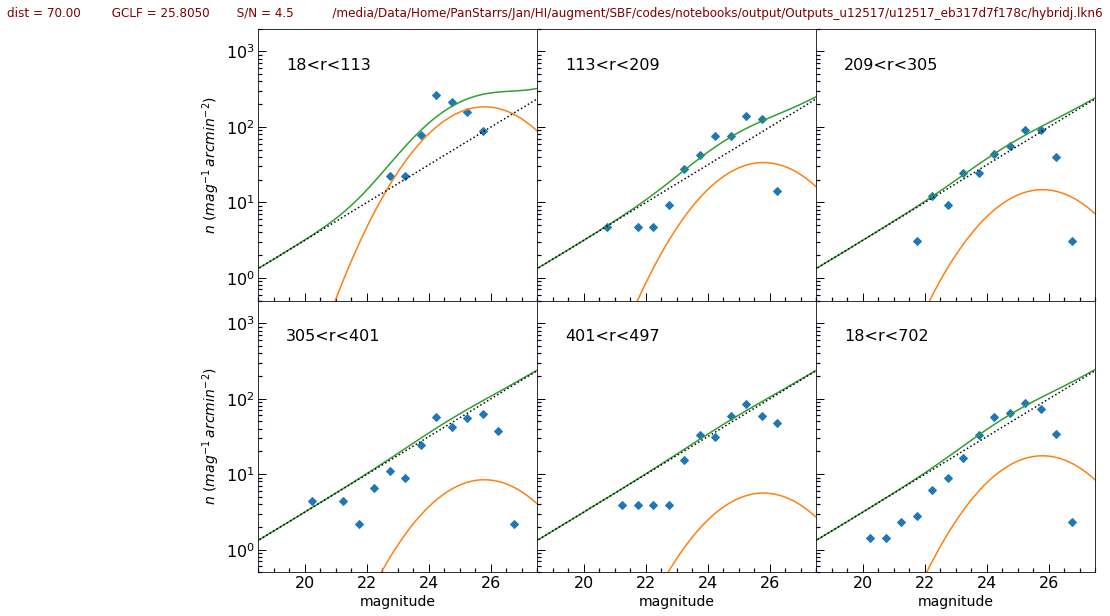

In [43]:
pylike(like_pack, 
            gclf_width=1.4, 
            distance=70, 
            bright_cutoff=22, 
            kscale=1.2, plot=True,
            **Config)

_ = Logtext(os.path.join(objRoot, "hybridj.lkn6"), "hybrid")

In [44]:
like_pack

('hybrid.lknj', 'hybridj.lkn6', 'hybridj.ptm6', 'resid.000.2dophot')

In [45]:
final_mask = edit_ptm6_mask(like_pack, self=True, rad=5, **Config)

modified mask name: hybridj.ptm6b
backup: hybridj.ptm6b.20240308151618


In [46]:
ptm6

'hybridj.ptm6'

residual file ready for dophot:  test.000


<Axes: >

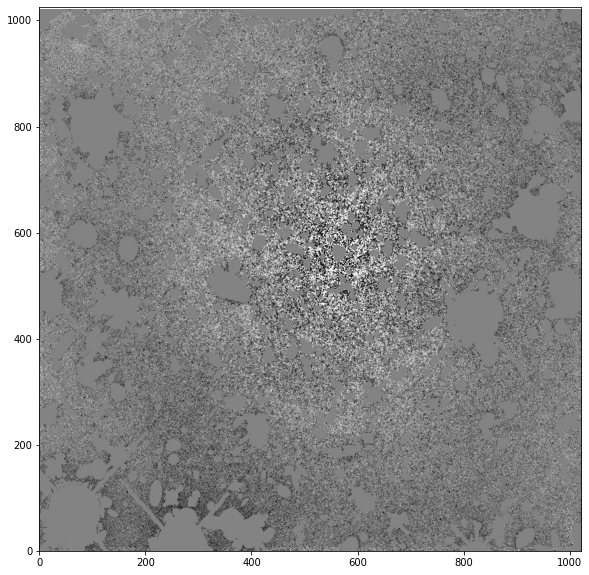

In [47]:
outfile = resid_ptm6(resid, [ptm6+"b", "test.fits"], outfile='test.000', **Config)

tv(os.path.join(objRoot, outfile))